Imports

In [1]:
import json
import pathlib
import pandas as pd
from scipy.stats import pearsonr, spearmanr, mannwhitneyu

Paths

cell 2

In [2]:
merged_dir = pathlib.Path("../experiments/merged_outputs")
hitl_dir   = pathlib.Path("../experiments/output/hitl")

Load merged outputs into a single DataFrame

cell 3

In [4]:
rows = []
for path in merged_dir.rglob("*_merged.json"):
    obj = json.loads(path.read_text())
    for rec in obj["records"]:
        rows.append({
            "model":   obj["model"],
            "dataset": obj["dataset"],
            **rec
        })
df = pd.DataFrame(rows)
df.head()

,model,dataset,id,model_verdict,statement,explanation,label,evidences,ragas_faithfulness_score,confidence,entailment_e2x_entail_prob,entailment_x2e_entail_prob,geval_q1_factual_claims_not_in_evidence,geval_q2_reflects_key_points,geval_faithfulness_score_0_5,geval_justification,geval_raw_response
0,mistral_7b_cot,hover_train,hover_train_full_docs-000001,SUPPORTED,Skagen Painter Peder Severin Krøyer favored na...,The evidence shows that Peder Severin Krøyer w...,SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",0.500000,0.95,0.046583,0.062024,"No, the explanation does not make any factual ...","Yes, the explanation faithfully reflects the k...",5.0,,"Here are my answers:\n\n1. No, the explanation..."
1,mistral_7b_cot,hover_train,hover_train_full_docs-000002,SUPPORTED,Skagen Painter Peder Severin Krøyer favored na...,The claim that Peder Severin Krøyer favored na...,SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",1.000000,1.00,0.045492,0.011121,"No, the explanation does not make any factual ...","Yes, the explanation faithfully reflects the k...",5.0,,"Here are my evaluations:\n\n1. No, the explana..."
2,mistral_7b_cot,hover_train,hover_train_full_docs-000003,SUPPORTED,Skagen Painter Peder Severin Krøyer favored na...,The claim suggests that Peder Severin Krøyer f...,NOT_SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",0.800000,0.95,0.110013,0.722680,"**No**, the explanation does not make any fact...","**Yes**, the explanation faithfully reflects t...",5.0,Justification: The explanation only uses infor...,"Here are my evaluations:\n\n1. **No**, the exp..."
3,mistral_7b_cot,hover_train,hover_train_full_docs-000004,SUPPORTED,"Skagen Painter, who painted the 1893 painting ...",The claim suggests that the Skagen Painter who...,NOT_SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",0.571429,0.95,0.946222,0.654226,"**Yes**, the explanation makes a factual claim...","**No**, the explanation does not faithfully re...",2.0,Justification: While the explanation accuratel...,"Here are my answers:\n\n1. **Yes**, the explan..."
4,mistral_7b_cot,hover_train,hover_train_full_docs-000005,SUPPORTED,Skagen Painter Peder Severin Krøyer favored na...,The evidence provides information about Peder ...,NOT_SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",0.600000,0.95,0.025016,0.407961,"**No**, the explanation does not make any fact...","**Yes**, the explanation faithfully reflects t...",5.0,Justification: The explanation accurately summ...,"Here are my evaluations:\n\n1. **No**, the exp..."


cell 4

In [5]:
df = df.rename(columns={
    "entailment_e2x_entail_prob": "e2x",
    "entailment_x2e_entail_prob": "x2e",
    "geval_faithfulness_score_0_5": "geval",
    "ragas_faithfulness_score":     "ragas"
})
metrics = ["e2x", "x2e", "geval", "ragas"]
df.head()

,model,dataset,id,model_verdict,statement,explanation,label,evidences,ragas,confidence,e2x,x2e,geval_q1_factual_claims_not_in_evidence,geval_q2_reflects_key_points,geval,geval_justification,geval_raw_response
0,mistral_7b_cot,hover_train,hover_train_full_docs-000001,SUPPORTED,Skagen Painter Peder Severin Krøyer favored na...,The evidence shows that Peder Severin Krøyer w...,SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",0.500000,0.95,0.046583,0.062024,"No, the explanation does not make any factual ...","Yes, the explanation faithfully reflects the k...",5.0,,"Here are my answers:\n\n1. No, the explanation..."
1,mistral_7b_cot,hover_train,hover_train_full_docs-000002,SUPPORTED,Skagen Painter Peder Severin Krøyer favored na...,The claim that Peder Severin Krøyer favored na...,SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",1.000000,1.00,0.045492,0.011121,"No, the explanation does not make any factual ...","Yes, the explanation faithfully reflects the k...",5.0,,"Here are my evaluations:\n\n1. No, the explana..."
2,mistral_7b_cot,hover_train,hover_train_full_docs-000003,SUPPORTED,Skagen Painter Peder Severin Krøyer favored na...,The claim suggests that Peder Severin Krøyer f...,NOT_SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",0.800000,0.95,0.110013,0.722680,"**No**, the explanation does not make any fact...","**Yes**, the explanation faithfully reflects t...",5.0,Justification: The explanation only uses infor...,"Here are my evaluations:\n\n1. **No**, the exp..."
3,mistral_7b_cot,hover_train,hover_train_full_docs-000004,SUPPORTED,"Skagen Painter, who painted the 1893 painting ...",The claim suggests that the Skagen Painter who...,NOT_SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",0.571429,0.95,0.946222,0.654226,"**Yes**, the explanation makes a factual claim...","**No**, the explanation does not faithfully re...",2.0,Justification: While the explanation accuratel...,"Here are my answers:\n\n1. **Yes**, the explan..."
4,mistral_7b_cot,hover_train,hover_train_full_docs-000005,SUPPORTED,Skagen Painter Peder Severin Krøyer favored na...,The evidence provides information about Peder ...,NOT_SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",0.600000,0.95,0.025016,0.407961,"**No**, the explanation does not make any fact...","**Yes**, the explanation faithfully reflects t...",5.0,Justification: The explanation accurately summ...,"Here are my evaluations:\n\n1. **No**, the exp..."


cell 5 - Normalize metrics from 0 to 1

In [6]:
df_norm = df.copy()
for m in metrics:
    lo, hi = df_norm[m].quantile([0.01, 0.99])
    df_norm[m] = df_norm[m].clip(lo, hi)
    df_norm[m] = (df_norm[m] - df_norm[m].min()) / (df_norm[m].max() - df_norm[m].min())
df_norm.head()

,model,dataset,id,model_verdict,statement,explanation,label,evidences,ragas,confidence,e2x,x2e,geval_q1_factual_claims_not_in_evidence,geval_q2_reflects_key_points,geval,geval_justification,geval_raw_response
0,mistral_7b_cot,hover_train,hover_train_full_docs-000001,SUPPORTED,Skagen Painter Peder Severin Krøyer favored na...,The evidence shows that Peder Severin Krøyer w...,SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",0.750000,0.95,0.045832,0.063322,"No, the explanation does not make any factual ...","Yes, the explanation faithfully reflects the k...",1.0,,"Here are my answers:\n\n1. No, the explanation..."
1,mistral_7b_cot,hover_train,hover_train_full_docs-000002,SUPPORTED,Skagen Painter Peder Severin Krøyer favored na...,The claim that Peder Severin Krøyer favored na...,SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",1.000000,1.00,0.044714,0.010535,"No, the explanation does not make any factual ...","Yes, the explanation faithfully reflects the k...",1.0,,"Here are my evaluations:\n\n1. No, the explana..."
2,mistral_7b_cot,hover_train,hover_train_full_docs-000003,SUPPORTED,Skagen Painter Peder Severin Krøyer favored na...,The claim suggests that Peder Severin Krøyer f...,NOT_SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",0.900000,0.95,0.110852,0.748428,"**No**, the explanation does not make any fact...","**Yes**, the explanation faithfully reflects t...",1.0,Justification: The explanation only uses infor...,"Here are my evaluations:\n\n1. **No**, the exp..."
3,mistral_7b_cot,hover_train,hover_train_full_docs-000004,SUPPORTED,"Skagen Painter, who painted the 1893 painting ...",The claim suggests that the Skagen Painter who...,NOT_SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",0.785714,0.95,0.968023,0.677440,"**Yes**, the explanation makes a factual claim...","**No**, the explanation does not faithfully re...",0.4,Justification: While the explanation accuratel...,"Here are my answers:\n\n1. **Yes**, the explan..."
4,mistral_7b_cot,hover_train,hover_train_full_docs-000005,SUPPORTED,Skagen Painter Peder Severin Krøyer favored na...,The evidence provides information about Peder ...,NOT_SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",0.800000,0.95,0.023724,0.422062,"**No**, the explanation does not make any fact...","**Yes**, the explanation faithfully reflects t...",1.0,Justification: The explanation accurately summ...,"Here are my evaluations:\n\n1. **No**, the exp..."


Add a binary accuracy flag

cell 6

In [7]:
df_norm["correct"] = (df_norm["label"] == df_norm["model_verdict"]).astype(int)
df_norm.head()

,model,dataset,id,model_verdict,statement,explanation,label,evidences,ragas,confidence,e2x,x2e,geval_q1_factual_claims_not_in_evidence,geval_q2_reflects_key_points,geval,geval_justification,geval_raw_response,correct
0,mistral_7b_cot,hover_train,hover_train_full_docs-000001,SUPPORTED,Skagen Painter Peder Severin Krøyer favored na...,The evidence shows that Peder Severin Krøyer w...,SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",0.750000,0.95,0.045832,0.063322,"No, the explanation does not make any factual ...","Yes, the explanation faithfully reflects the k...",1.0,,"Here are my answers:\n\n1. No, the explanation...",1
1,mistral_7b_cot,hover_train,hover_train_full_docs-000002,SUPPORTED,Skagen Painter Peder Severin Krøyer favored na...,The claim that Peder Severin Krøyer favored na...,SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",1.000000,1.00,0.044714,0.010535,"No, the explanation does not make any factual ...","Yes, the explanation faithfully reflects the k...",1.0,,"Here are my evaluations:\n\n1. No, the explana...",1
2,mistral_7b_cot,hover_train,hover_train_full_docs-000003,SUPPORTED,Skagen Painter Peder Severin Krøyer favored na...,The claim suggests that Peder Severin Krøyer f...,NOT_SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",0.900000,0.95,0.110852,0.748428,"**No**, the explanation does not make any fact...","**Yes**, the explanation faithfully reflects t...",1.0,Justification: The explanation only uses infor...,"Here are my evaluations:\n\n1. **No**, the exp...",0
3,mistral_7b_cot,hover_train,hover_train_full_docs-000004,SUPPORTED,"Skagen Painter, who painted the 1893 painting ...",The claim suggests that the Skagen Painter who...,NOT_SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",0.785714,0.95,0.968023,0.677440,"**Yes**, the explanation makes a factual claim...","**No**, the explanation does not faithfully re...",0.4,Justification: While the explanation accuratel...,"Here are my answers:\n\n1. **Yes**, the explan...",0
4,mistral_7b_cot,hover_train,hover_train_full_docs-000005,SUPPORTED,Skagen Painter Peder Severin Krøyer favored na...,The evidence provides information about Peder ...,NOT_SUPPORTED,"[Peder Henrik Kristian Zahrtmann, known as Kri...",0.800000,0.95,0.023724,0.422062,"**No**, the explanation does not make any fact...","**Yes**, the explanation faithfully reflects t...",1.0,Justification: The explanation accurately summ...,"Here are my evaluations:\n\n1. **No**, the exp...",0


cell 7

     e2x (17485 samples) → r = 0.059, p = 5.34e-15
     x2e (17485 samples) → r = -0.053, p = 3.35e-12
   geval (17485 samples) → r = 0.134, p = 1.64e-70
   ragas (17478 samples) → r = 0.081, p = 1.37e-26
combined (17485 samples) → r = 0.101, p = 1.44e-40


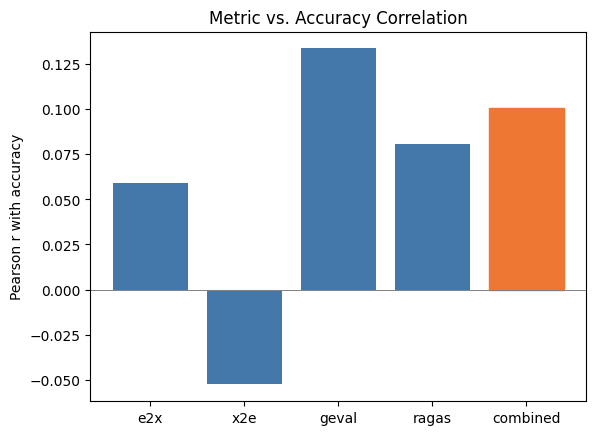

In [22]:

from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

# Combined: mean of available metrics per row (skip NaNs)
df_norm["combined"] = df_norm[metrics].mean(axis=1, skipna=True)

pearson_results = {}
for m in metrics + ["combined"]:
    sub = df_norm[[m, "correct"]].dropna()
    r, p = pearsonr(sub[m], sub["correct"])
    n = len(sub)
    pearson_results[m] = r
    print(f"{m:>8} ({n} samples) → r = {r:.3f}, p = {p:.3g}")

# Plot bar chart of Pearson r
plt.figure()
bars = plt.bar(pearson_results.keys(), pearson_results.values(), color=['#4477aa']*len(metrics) + ['#ee7733'])
plt.ylabel("Pearson r with accuracy")
plt.title("Metric vs. Accuracy Correlation")
plt.axhline(0, color='gray', linewidth=0.7)
# Highlight the combined score bar
bars[-1].set_color('#ee7733')
plt.show()

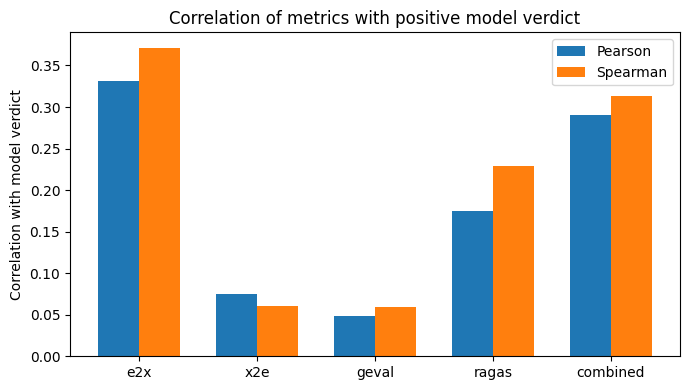

In [48]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np

# Map model_verdict to binary (if not already done)
df_norm["verdict_num"] = df_norm["model_verdict"].map({"SUPPORTED": 1, "NOT_SUPPORTED": 0})

pear_vals = []
spear_vals = []
labels = metrics + ["combined"]

for m in labels:
    sub = df_norm[[m, "verdict_num"]].dropna()
    if len(sub) < 2:
        pear_vals.append(np.nan)
        spear_vals.append(np.nan)
        continue
    pear_r, _ = pearsonr(sub[m], sub["verdict_num"])
    spear_r, _ = spearmanr(sub[m], sub["verdict_num"])
    pear_vals.append(pear_r)
    spear_vals.append(spear_r)

# Plot
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(7, 4))
bar1 = plt.bar(x - width/2, pear_vals, width, label='Pearson')
bar2 = plt.bar(x + width/2, spear_vals, width, label='Spearman')

plt.xticks(x, labels)
plt.ylabel("Correlation with model verdict")
plt.title("Correlation of metrics with positive model verdict")
plt.axhline(0, color="gray", linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()

cell 8

e2x  ↔ x2e  → ρ = 0.093
e2x  ↔ geval → ρ = 0.168
e2x  ↔ ragas → ρ = 0.300
x2e  ↔ geval → ρ = -0.029
x2e  ↔ ragas → ρ = -0.005
geval ↔ ragas → ρ = 0.194


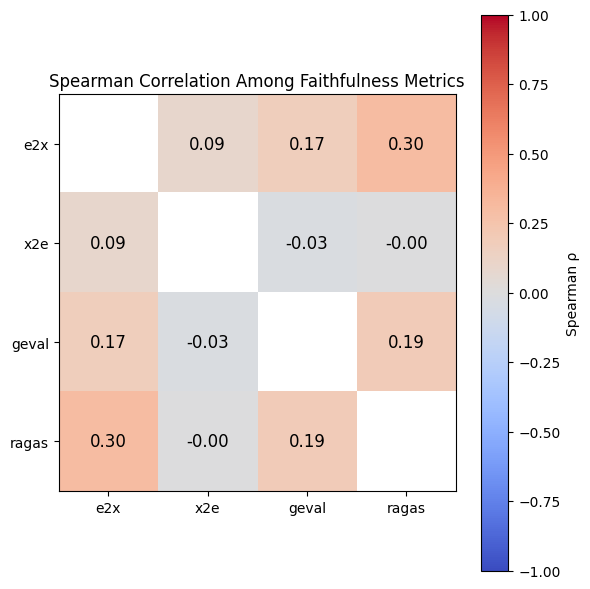

In [19]:
# Cell 8: Pairwise Spearman correlations among metrics + annotated heatmap (robust)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Ensure all metrics columns are float
for m in metrics:
    df_norm[m] = pd.to_numeric(df_norm[m], errors='coerce')

n = len(metrics)
corr_matrix = np.full((n, n), np.nan)
for i in range(n):
    for j in range(n):
        a, b = metrics[i], metrics[j]
        sub = df_norm[[a, b]].dropna()
        if len(sub) >= 2:
            rho, _ = spearmanr(sub[a], sub[b])
            if np.isscalar(rho):
                corr_matrix[i, j] = float(rho)
            else:
                corr_matrix[i, j] = np.nan
        else:
            corr_matrix[i, j] = np.nan

# Print upper-triangle results
for i in range(n):
    for j in range(i+1, n):
        print(f"{metrics[i]:<4} ↔ {metrics[j]:<4} → ρ = {corr_matrix[i,j]:.3f}")

# Plot annotated heatmap
plt.figure(figsize=(6,6))
im = plt.imshow(corr_matrix, aspect='equal', vmin=-1, vmax=1, cmap='coolwarm')
plt.colorbar(im, label="Spearman ρ")
plt.xticks(range(n), metrics)
plt.yticks(range(n), metrics)
plt.title("Spearman Correlation Among Faithfulness Metrics")

# Annotate the heatmap
for i in range(n):
    for j in range(n):
        val = corr_matrix[i, j]
        if not np.isnan(val):
            plt.text(j, i, f"{val:.2f}", ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()

In [10]:
summary_by_dataset = df_norm.groupby("dataset")[metrics + ["correct"]].agg(["mean","std","count"])
display(summary_by_dataset)

e2x                        x2e                      geval  \
                 mean       std  count      mean       std  count      mean   
dataset                                                                       
covid_fact   0.338500  0.366443   5000  0.211413  0.310740   5000  0.800000   
hover_train  0.235727  0.297508  10000  0.079418  0.148053  10000  0.890400   
politi_hop   0.416148  0.351792   2485  0.077655  0.172441   2485  0.966117   

                                 ragas                   correct            \
                  std  count      mean       std count      mean       std   
dataset                                                                      
covid_fact   0.324427   5000  0.871120  0.139248  5000  0.622200  0.484886   
hover_train  0.265546  10000  0.831571  0.191277  9993  0.635700  0.481257   
politi_hop   0.144110   2485  0.893956  0.156997  2485  0.897787  0.302990   

                    
             count  
dataset             
covid_fact    5000  
hover_train  10000  
politi_hop    2485

In [11]:
summary_by_model = df_norm.groupby("model")[metrics + ["correct"]].agg(["mean","std","count"])
display(summary_by_model)

e2x                       x2e                  \
                         mean       std count      mean       std count   
model                                                                     
deepseek_r1_32b_cot  0.226553  0.309349  3497  0.092932  0.182284  3497   
gpt4o_cot            0.311013  0.330174  3497  0.124744  0.223489  3497   
gpt4o_non_cot        0.268019  0.316063  3497  0.111965  0.215771  3497   
mistral_7b_cot       0.315049  0.344729  3497  0.132295  0.239594  3497   
mistral_7b_non_cot   0.333156  0.353992  3497  0.122627  0.227408  3497   

                        geval                     ragas                  \
                         mean       std count      mean       std count   
model                                                                     
deepseek_r1_32b_cot  0.855648  0.298399  3497  0.846493  0.179256  3496   
gpt4o_cot            0.905176  0.238174  3497  0.857610  0.169415  3497   
gpt4o_non_cot        0.895167  0.259779  3497  0.862279  0.165060  3492   
mistral_7b_cot       0.854561  0.291444  3497  0.843634  0.179663  3497   
mistral_7b_non_cot   0.865999  0.284922  3497  0.848770  0.179522  3496   

                      correct                  
                         mean       std count  
model                                          
deepseek_r1_32b_cot  0.694309  0.460765  3497  
gpt4o_cot            0.712039  0.452878  3497  
gpt4o_non_cot        0.681727  0.465873  3497  
mistral_7b_cot       0.631398  0.482495  3497  
mistral_7b_non_cot   0.625965  0.483942  3497

In [23]:
import pandas as pd
import json
import pathlib

# Load all HITL files into one DataFrame
hitl_rows = []
for path in pathlib.Path("../experiments/output/hitl").rglob("*.results.json"):
    model   = path.parent.name
    dataset = path.stem.rsplit("_", 2)[0]
    data    = json.loads(path.read_text())
    for rec in data:
        rec.update(model=model, dataset=dataset)
        hitl_rows.append(rec)
hitl = pd.DataFrame(hitl_rows)

# Merge on model, dataset, id
df_hitl = hitl.merge(df_norm, on=["model", "dataset", "id"], suffixes=("_human", "_auto"))
print(f"Merged {len(df_hitl)} rows.")
df_hitl.head()

Merged 75 rows.


,id,statement_human,label_human,evidences_human,model_verdict_human,explanation_human,confidence_human,human_score,model,dataset,...,confidence_auto,e2x,x2e,geval_q1_factual_claims_not_in_evidence,geval_q2_reflects_key_points,geval,geval_justification,geval_raw_response,correct,combined
0,covid_fact-000655,The sars-cov-2 cytopathic effect is compatible...,NOT_SUPPORTED,[One Sentence Summary Blocking SARS-CoV-2 cyto...,SUPPORTED,The evidence suggests that SARS-CoV-2 cytopath...,0.80,4.0,gpt4o_cot,covid_fact,...,0.80,0.993316,0.310592,"**Yes**, the explanation makes a factual claim...","**No**, the explanation does not faithfully re...",0.4,,"Here are my evaluations:\n\n1. **Yes**, the ex...",0,0.675977
1,covid_fact-000115,New self-administered coronavirus test found e...,SUPPORTED,[Self-administered COVID-19 coronavirus can be...,SUPPORTED,The claim that a new self-administered coronav...,0.95,5.0,gpt4o_cot,covid_fact,...,0.95,1.000000,0.942203,"**No**, the explanation does not make any fact...","**Yes**, the explanation faithfully reflects t...",1.0,,"Here are my evaluations:\n\n1. **No**, the exp...",1,0.985551
2,covid_fact-000026,Fenofibrate increases the amount of sulfatide ...,SUPPORTED,"[Also in a population, treatment with agents t...",SUPPORTED,The evidence explicitly mentions that fenofibr...,0.80,5.0,gpt4o_cot,covid_fact,...,0.80,0.524093,0.030884,**No**: The explanation only summarizes the ke...,**Yes**: The explanation accurately reflects t...,1.0,Justification: The explanation is a straightfo...,Here are my evaluations:\n\n1. **No**: The exp...,1,0.613744
3,covid_fact-000760,White house 's opening up america again guidel...,SUPPORTED,"[According to the White House, once these crit...",SUPPORTED,The evidence confirms that the 'Opening Up Ame...,0.90,4.0,gpt4o_cot,covid_fact,...,0.90,0.289631,0.116765,"**No**, the explanation does not make any fact...","**Yes**, the explanation faithfully reflects t...",1.0,,"Here are my evaluations:\n\n1. **No**, the exp...",1,0.601599
4,covid_fact-000282,Mucus production stimulated by ifn-ahr signali...,NOT_SUPPORTED,"[Together, these results suggest that mucus is...",NOT_SUPPORTED,The evidence provided mentions mucus productio...,0.60,5.0,gpt4o_cot,covid_fact,...,0.60,0.823596,0.466484,"**No**, the explanation does not make any fact...","**Yes**, the explanation faithfully reflects t...",1.0,,"Here are my evaluations:\n\n1. **No**, the exp...",1,0.760020


Spearman correlation between auto-metrics and human_score:
     e2x (N=75) → ρ = -0.091, p = 0.438
     x2e (N=75) → ρ = 0.122, p = 0.299
   geval (N=75) → ρ = -0.073, p = 0.533
   ragas (N=75) → ρ = 0.006, p = 0.957
combined (N=75) → ρ = -0.016, p = 0.892


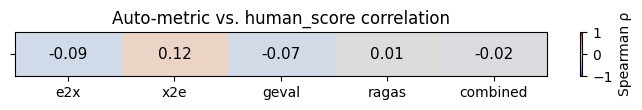

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr

correlations = []
labels = metrics + ["combined"]

print("Spearman correlation between auto-metrics and human_score:")
for m in labels:
    sub = df_hitl[[m, "human_score"]].dropna()
    if len(sub) < 2:
        print(f"{m:>8}: not enough data")
        correlations.append(np.nan)
        continue
    rho, p = spearmanr(sub[m], sub["human_score"])
    print(f"{m:>8} (N={len(sub)}) → ρ = {rho:.3f}, p = {p:.3g}")
    correlations.append(rho)

# Plot heatmap
corr_array = np.array(correlations).reshape(1, -1)
plt.figure(figsize=(7, 1.2))
im = plt.imshow(corr_array, aspect='auto', cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(range(len(labels)), labels)
plt.yticks([0], [''])
plt.colorbar(im, label="Spearman ρ")
plt.title("Auto-metric vs. human_score correlation")
# Annotate with values
for i, rho in enumerate(correlations):
    if not np.isnan(rho):
        plt.text(i, 0, f"{rho:.2f}", ha='center', va='center', color='black', fontsize=11)
plt.tight_layout()
plt.show()

Grounding of metrics in human data

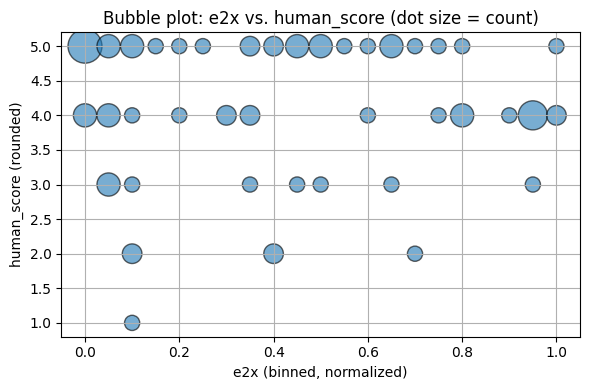

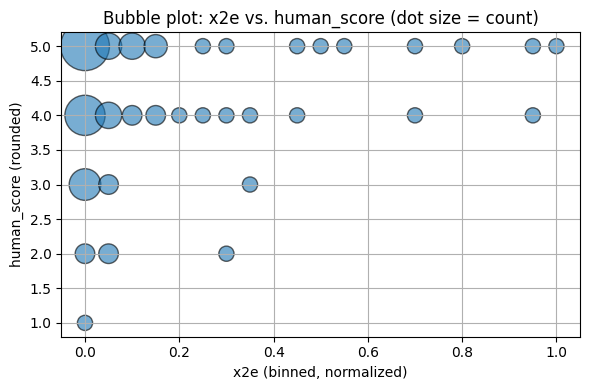

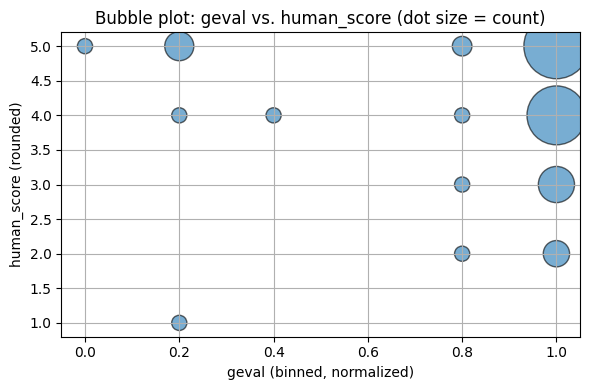

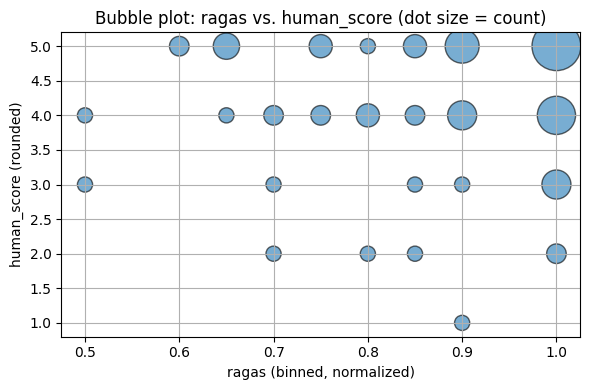

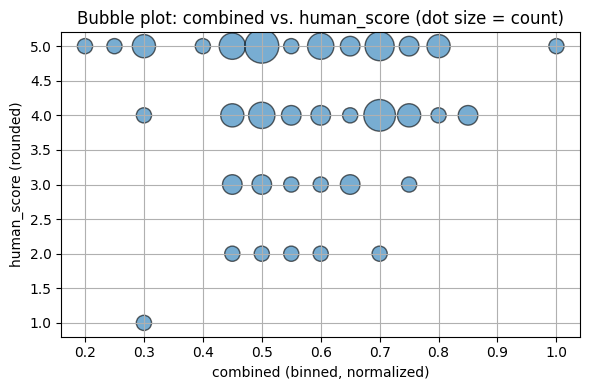

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

for m in metrics + ["combined"]:
    sub = df_hitl[[m, "human_score"]].dropna()
    if len(sub) < 2:
        continue

    # Bin metric value (round to nearest 0.05 for grouping—tweak as needed)
    metric_bin = (sub[m] * 20).round() / 20
    # If human_score is not integer, also bin it (usually it's 1-5)
    human_bin = sub["human_score"].round()

    grouped = (
        pd.DataFrame({"metric": metric_bin, "human": human_bin})
        .groupby(["metric", "human"])
        .size()
        .reset_index(name="count")
    )

    # Plot: dot size = count
    plt.figure(figsize=(6,4))
    plt.scatter(
        grouped["metric"], grouped["human"],
        s=40 + 80*grouped["count"],
        alpha=0.6, edgecolor='k'
    )
    plt.xlabel(f"{m} (binned, normalized)")
    plt.ylabel("human_score (rounded)")
    plt.title(f"Bubble plot: {m} vs. human_score (dot size = count)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Distribution of diff metrics

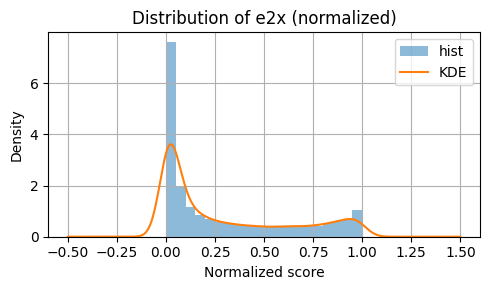

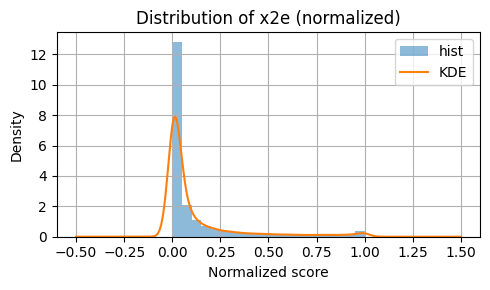

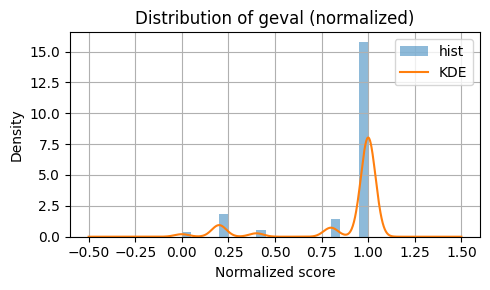

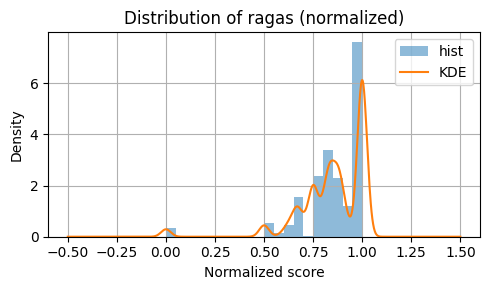

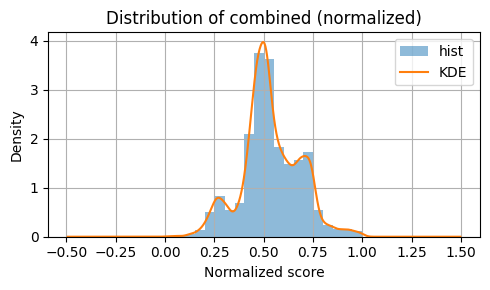

In [34]:
import matplotlib.pyplot as plt

for m in metrics + ["combined"]:
    data = df_norm[m].dropna()
    plt.figure(figsize=(5, 3))
    plt.hist(data, bins=20, density=True, alpha=0.5, label="hist")
    try:
        # KDE for continuous metrics
        data.plot(kind="kde", label="KDE")
    except Exception:
        pass  # skip KDE for non-continuous
    plt.title(f"Distribution of {m} (normalized)")
    plt.xlabel("Normalized score")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

e2x above 0.5

Rows with e2x > 0.95: 17310


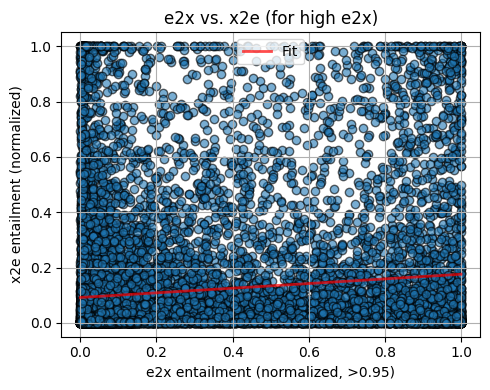

In [58]:

filtered = df_norm[df_norm["e2x"] > 0.00].copy()
print(f"Rows with e2x > 0.95: {len(filtered)}")

sub = filtered[["e2x", "x2e"]].dropna()
if len(sub) < 2:
    print("Not enough data to plot.")
else:
    plt.figure(figsize=(5, 4))
    plt.scatter(sub["e2x"], sub["x2e"], alpha=0.6, edgecolor="k")
    plt.xlabel("e2x entailment (normalized, >0.95)")
    plt.ylabel("x2e entailment (normalized)")
    plt.title("e2x vs. x2e (for high e2x)")
    # Optional: plot regression line if enough points and some variance in x2e
    if sub["x2e"].nunique() > 1:
        z = np.polyfit(sub["e2x"], sub["x2e"], 1)
        x_range = np.linspace(sub["e2x"].min(), sub["e2x"].max(), 100)
        plt.plot(x_range, np.polyval(z, x_range), color="red", lw=2, alpha=0.7, label="Fit")
        plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


obscure cases

In [61]:
threshold_high = 0.8
threshold_low = 0.2

for dataset in df_norm["dataset"].unique():
    d = df_norm[df_norm["dataset"] == dataset]
    print(f"\n=== {dataset} ===")

    # 1. High metrics but incorrect verdict
    mask_high = (
        (d["e2x"]   >= threshold_high) &
        (d["x2e"]   >= threshold_high) &
        (d["geval"] >= threshold_high) &
        (d["ragas"] >= threshold_high) &
        (d["correct"] == 0)
    )
    highs = d[mask_high].sample(n=min(2, mask_high.sum()), random_state=0) if mask_high.sum() else pd.DataFrame()
    print("High faithfulness but incorrect verdict:")
    if len(highs) == 0:
        print("  [None found]")
    else:
        for _, row in highs.iterrows():
            print(f"- ID: {row['id']}")
            print(f"  Statement: {row['statement']}")
            print(f"  Model verdict: {row['model_verdict']}, Gold: {row['label']}")
            print(f"  e2x: {row['e2x']:.2f}, x2e: {row['x2e']:.2f}, geval: {row['geval']:.2f}, ragas: {row['ragas']:.2f}")
            print(f"  Explanation: {row['explanation']}")
            print("  Evidences:")
            for ev in row.get("evidences", [])[:3]:
                print(f"    - {ev}")
            if row.get("evidences") and len(row["evidences"]) > 3:
                print(f"    ...and {len(row['evidences'])-3} more")
            print()

    # 2. Low metrics but correct verdict
    mask_low = (
        (d["e2x"]   <= threshold_low) &
        (d["x2e"]   <= threshold_low) &
        (d["geval"] <= threshold_low) &
        (d["ragas"] <= threshold_low) &
        (d["correct"] == 1)
    )
    lows = d[mask_low].sample(n=min(2, mask_low.sum()), random_state=1) if mask_low.sum() else pd.DataFrame()
    print("Low faithfulness but correct verdict:")
    if len(lows) == 0:
        print("  [None found]")
    else:
        for _, row in lows.iterrows():
            print(f"- ID: {row['id']}")
            print(f"  Statement: {row['statement']}")
            print(f"  Model verdict: {row['model_verdict']}, Gold: {row['label']}")
            print(f"  e2x: {row['e2x']:.2f}, x2e: {row['x2e']:.2f}, geval: {row['geval']:.2f}, ragas: {row['ragas']:.2f}")
            print(f"  Explanation: {row['explanation']}")
            print("  Evidences:")
            for ev in row.get("evidences", [])[:3]:
                print(f"    - {ev}")
            if row.get("evidences") and len(row["evidences"]) > 3:
                print(f"    ...and {len(row['evidences'])-3} more")
            print()


=== hover_train ===
High faithfulness but incorrect verdict:
- ID: hover_train_full_docs-000611
  Statement: The gourmet plate Chicken fried steak from a meat and three restaurant consists of a piece of steak coated with seasoned flour and pan-fried.
  Model verdict: SUPPORTED, Gold: NOT_SUPPORTED
  e2x: 0.92, x2e: 0.92, geval: 1.00, ragas: 1.00
  Explanation: The claim is that chicken fried steak, as served in a meat and three restaurant, consists of steak coated with seasoned flour and pan-fried. The evidence confirms that chicken fried steak is a breaded cutlet dish made of steak (specifically tenderized cube steak), coated with seasoned flour, and pan-fried. It is also associated with Southern cuisine, which aligns with the concept of a meat and three restaurant common in the Southern United States.
  Evidences:
    - In the cuisine of the Southern United States, a meat and three restaurant is one where the customer picks one meat from a daily selection of three to six choices (su

per-dataset and per-model

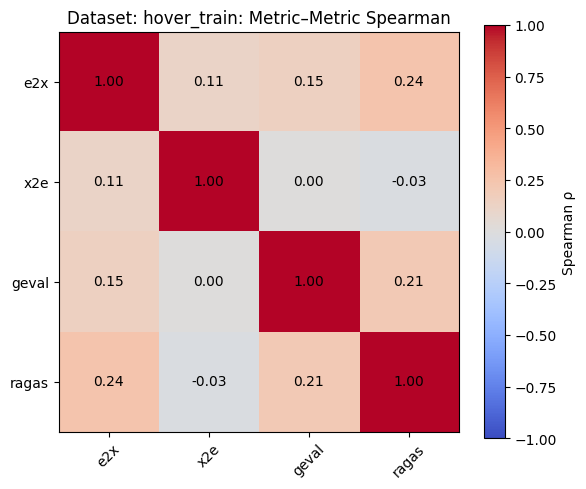

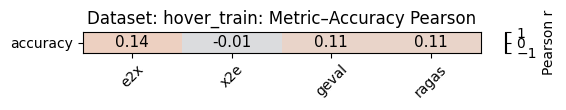

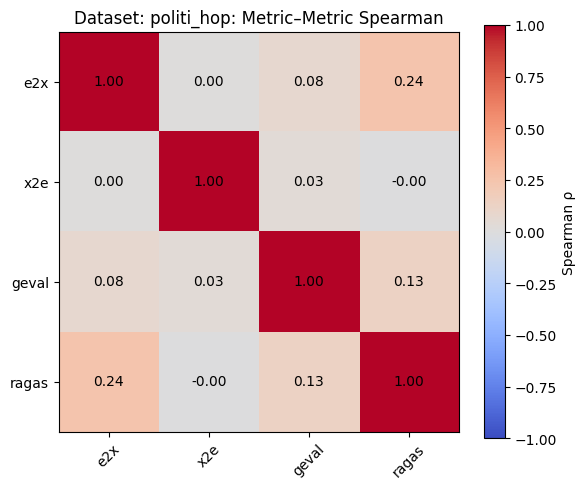

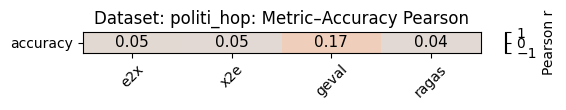

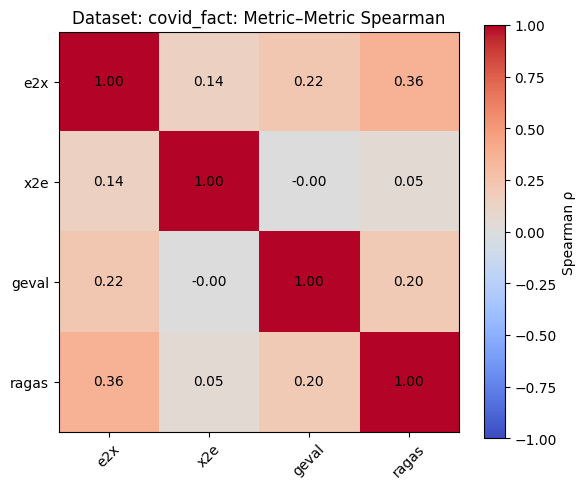

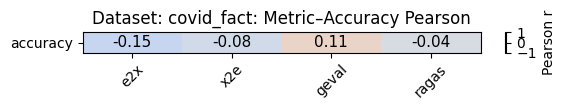

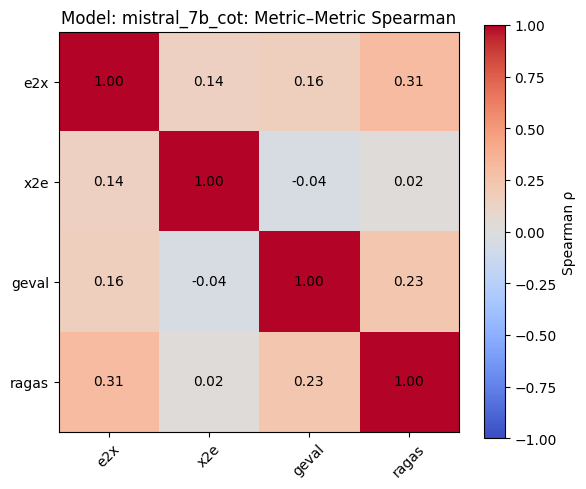

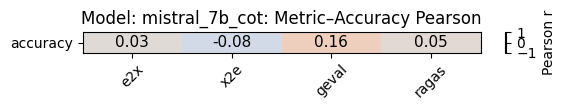

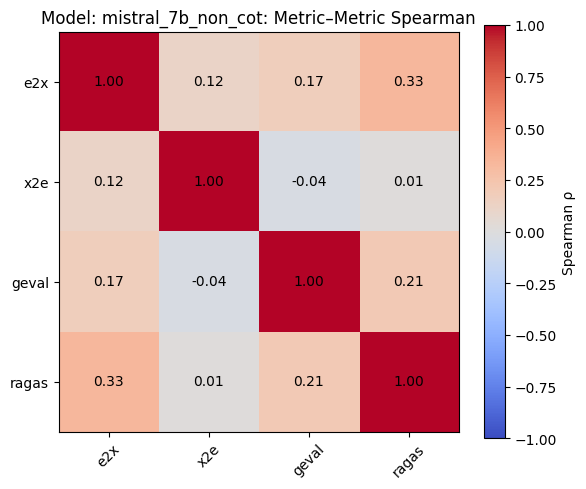

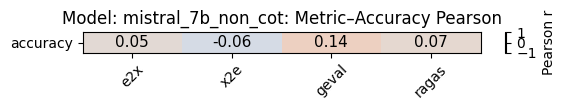

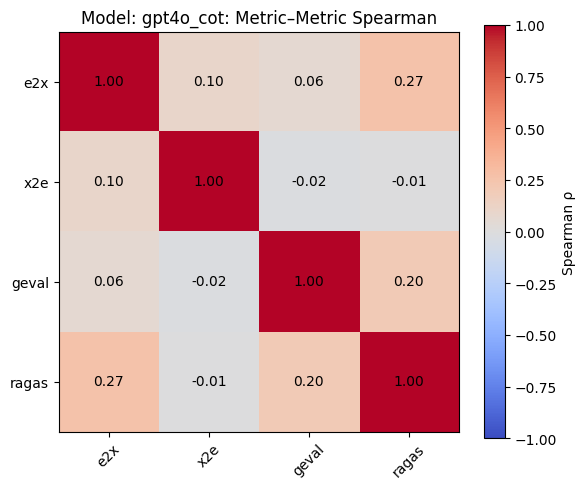

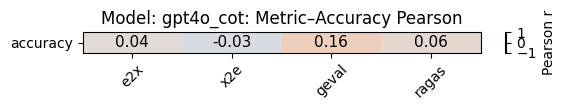

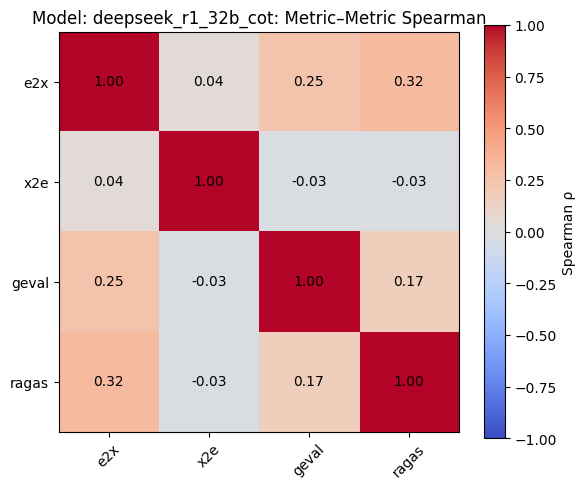

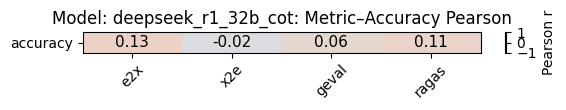

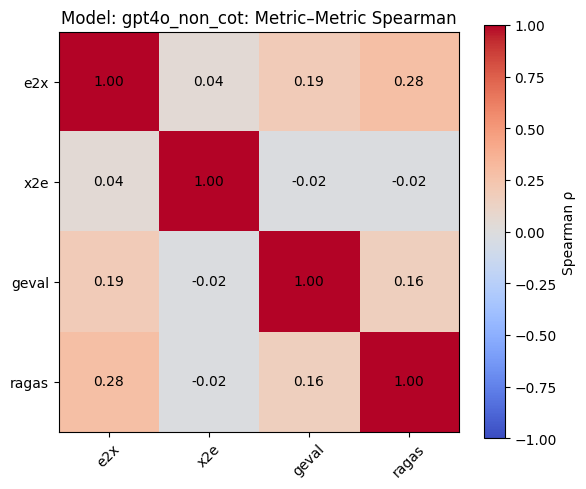

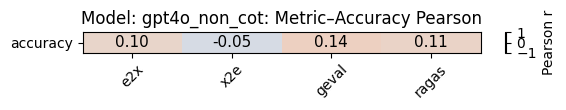

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use only individual metrics
all_metrics_no_combined = metrics  # metrics should already be defined: ["e2x", "x2e", "geval", "ragas"]

def plot_corr_heatmap(df, group_label):
    """Plots metric–metric and metric–accuracy correlation heatmaps for a DataFrame."""
    # Ensure only numeric
    mdf = df[all_metrics_no_combined + ["correct"]].apply(pd.to_numeric, errors="coerce")
    # Metric-metric Spearman
    metric_corr = mdf[all_metrics_no_combined].corr(method="spearman")
    # Metric-accuracy Pearson
    acc_corr = mdf[all_metrics_no_combined + ["correct"]].corr(method="pearson").loc[all_metrics_no_combined, "correct"]

    # Main heatmap
    plt.figure(figsize=(6,5))
    im = plt.imshow(metric_corr, cmap="coolwarm", vmin=-1, vmax=1)
    plt.colorbar(im, label="Spearman ρ")
    plt.xticks(range(len(all_metrics_no_combined)), all_metrics_no_combined, rotation=45)
    plt.yticks(range(len(all_metrics_no_combined)), all_metrics_no_combined)
    plt.title(f"{group_label}: Metric–Metric Spearman")
    # Annotate
    for i in range(len(all_metrics_no_combined)):
        for j in range(len(all_metrics_no_combined)):
            val = metric_corr.iloc[i, j]
            if not np.isnan(val):
                plt.text(j, i, f"{val:.2f}", ha="center", va="center", color="black", fontsize=10)
    plt.tight_layout()
    plt.show()

    # Accuracy heatmap
    plt.figure(figsize=(6,1.2))
    arr = acc_corr.values.reshape(1,-1)
    im = plt.imshow(arr, aspect="auto", cmap="coolwarm", vmin=-1, vmax=1)
    plt.colorbar(im, label="Pearson r")
    plt.xticks(range(len(all_metrics_no_combined)), all_metrics_no_combined, rotation=45)
    plt.yticks([0], ["accuracy"])
    plt.title(f"{group_label}: Metric–Accuracy Pearson")
    # Annotate
    for i, v in enumerate(acc_corr):
        if not np.isnan(v):
            plt.text(i, 0, f"{v:.2f}", ha="center", va="center", color="black", fontsize=11)
    plt.tight_layout()
    plt.show()

# --- By dataset ---
for dataset in df_norm["dataset"].unique():
    sub = df_norm[df_norm["dataset"] == dataset]
    if len(sub) < 5:
        continue
    plot_corr_heatmap(sub, f"Dataset: {dataset}")

# --- By model ---
for model in df_norm["model"].unique():
    sub = df_norm[df_norm["model"] == model]
    if len(sub) < 5:
        continue
    plot_corr_heatmap(sub, f"Model: {model}")